In [2]:
!python --version

Python 3.4.5 :: Continuum Analytics, Inc.


- ref : https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset
- ref : https://blog.nycdatascience.com/student-works/machine-learning/movie-rating-prediction/
- ref : https://iamalivingcontradiction.wordpress.com/tag/scikit-learn/
- ref : http://seaborn.pydata.org/

# Purpose : * Get overview of imdb 5000 movie data 

In [38]:
import pymysql
from pymysql import * 
from sqlalchemy import create_engine
import datetime as dt   
import time
import pandas as pd, numpy as np
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


//anaconda/envs/g_dash/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)
//anaconda/envs/g_dash/lib/python3.4/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['__version__', 'connect']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [28]:
def insert_data_df_local_mysql():
	try:
		# db = dbname, table = offer 
		engine = create_engine('mysql+pymysql://root@localhost/local_dev')
		df=pd.read_csv('/Users/yennanliu/Desktop/movie_metadata.csv')
		df.to_sql('movie_metadata', engine, if_exists = 'append')
		print ('insert df OK')
	except:
		print ('insert df failed')
        

def sqlalchemy_connect():
	try:
		engine = create_engine('mysql+pymysql://root@localhost/local_dev')
		print ('connect success')
		query="SELECT * FROM movie_metadata limit 10"
		df = pd.read_sql_query(query, engine)
		df.head()
		return df 
	except:
		print ('MySQL connect failed')
        
def grab_data(query):
	try:
		engine = create_engine('mysql+pymysql://root@localhost/local_dev')
		print ('connect success')
		print (query)
		df = pd.read_sql_query(query, engine)
		df.head()
		return df 
	except:
		print ('MySQL connect failed')
    


In [12]:
#insert_data_df_local_mysql()

insert df OK


In [32]:
df = grab_data("select * from movie_metadata")

connect success
select * from movie_metadata


In [34]:
df.head()

,index,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,4,None,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,...,NaN,None,None,None,NaN,NaN,12.0,7.1,NaN,0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 29 columns):
index                        5043 non-null int64
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-n

//anaconda/envs/g_dash/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


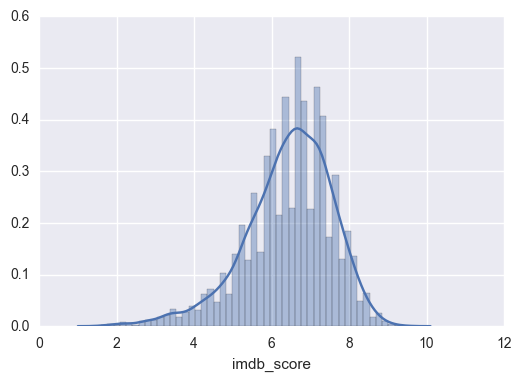

In [42]:
sns.distplot(df['imdb_score'])

In [57]:
query = """
select movie_title, count(*) from movie_metadata group by movie_title order by count(*) desc 
"""


movie_count = grab_data(query)

connect success

select movie_title, count(*) from movie_metadata group by movie_title order by count(*) desc 



In [58]:
movie_count

,movie_title,count(*)
0,The Fast and the Furious,3
1,Victor Frankenstein,3
2,Pan,3
3,Ben-Hur,3
4,King Kong,3
5,Home,3
6,Halloween,3
7,The Legend of Tarzan,2
8,The Twilight Saga: Breaking Dawn - Part 2,2
9,Godzilla Resurgence,2


In [44]:
df.columns

Index(['index', 'color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')